In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from plot_decision_boundary import plot_decision_boundary

In [65]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary2(clf, X, y, labels, transformation = None):
    '''Function for plotting the classification boundaries.
    
    INPUTS:
    
        clf: a sklearn classifier
        
        X: feature matrix
        
        y: target vector ({0,1} or {0,1,2})
        
        labels: vector with the class labels
    '''
    # get axes names
    axes_names = X.columns
    # get axes limits
    axes=[X.iloc[:,0].min()-0.5, X.iloc[:,0].max()+0.5, X.iloc[:,1].min()-0.5, X.iloc[:,1].max()+0.5]
    # create a 1000x1000 meshgrid
    x1s = np.linspace(axes[0], axes[1], 1000)
    x2s = np.linspace(axes[2], axes[3], 1000)
    x1, x2 = np.meshgrid(x1s, x2s) 
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # make a prediction at each point of the mesh grid
    if transformation == None:
        y_pred = clf.predict(X_new).reshape(x1.shape)
    else:
        X_new_transformed = transformation.transform(X_new)
        y_pred = clf.predict(X_new_transformed).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']) # some nice colors
    # contour map
    colors = ['red','blue','green']
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    for i in range(len(labels)):
        plt.plot(X.loc[y==i,axes_names[0]],X.loc[y==i,axes_names[1]], 'o', color=colors[i], label = labels[i])

    'set axes'
    plt.axis(axes)
    'axes labels'
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    'plot legend'
    plt.legend(loc="lower right", fontsize=14)

# 1. Binary Classification Algorithms

- Linear Models (regression and Logistic regression)
- Nearest Neighbor Classifiers 

## Load the data

In [3]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris = pd.read_csv(url, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**goal:** predict if species is setosa or not

In [4]:
def is_setosa(species):
    if species == 'Iris-setosa':
        return 1
    else:
        return 0

iris['is_setosa'] = iris.species.apply(is_setosa)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,is_setosa
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In this example, we'll use only two features (petal_length and petal_width). 

In [5]:
iris.drop(['sepal_length','sepal_width','species'],axis=1,inplace=True) 
iris.head() # bidimensional dataset

,petal_length,petal_width,is_setosa
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


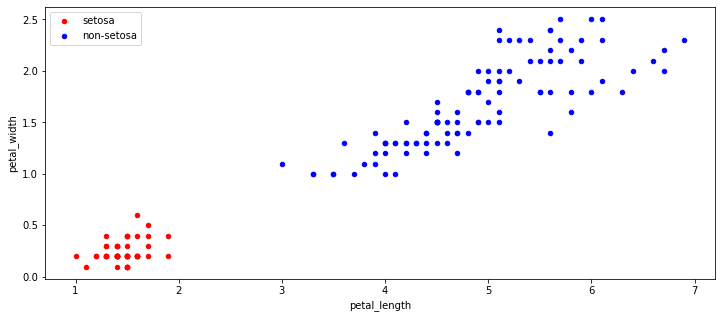

In [6]:
# plot the dataset
fig, ax = plt.subplots(figsize=(12,5))

iris.loc[iris.is_setosa==1,:].plot.scatter(x='petal_length',y='petal_width', c='red', ax=ax, label='setosa') # setosa
iris.loc[iris.is_setosa==0,:].plot.scatter(x='petal_length',y='petal_width', c='blue', ax=ax, label='non-setosa') # non-setosa

## 1.1. Linear Regression

This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task.

In [7]:
X = iris[['petal_length','petal_width']]
y = iris.is_setosa

In [8]:
from sklearn.linear_model import RidgeClassifier
linear_clf = RidgeClassifier() # import classifier
linear_clf.fit(X,y) # train the classifier

RidgeClassifier()

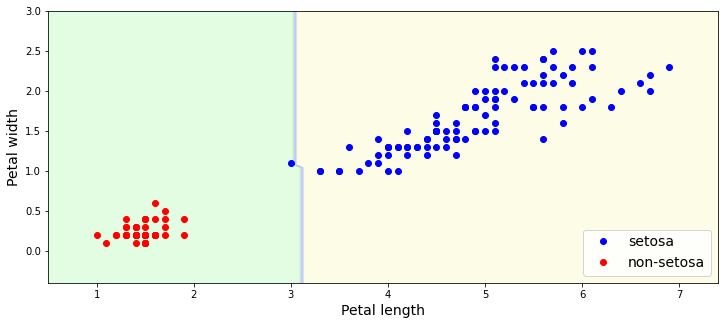

In [9]:
plt.figure(figsize=(12,5))
plot_decision_boundary(linear_clf, X, y,labels=['setosa','non-setosa'])

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X,y)

LogisticRegression()

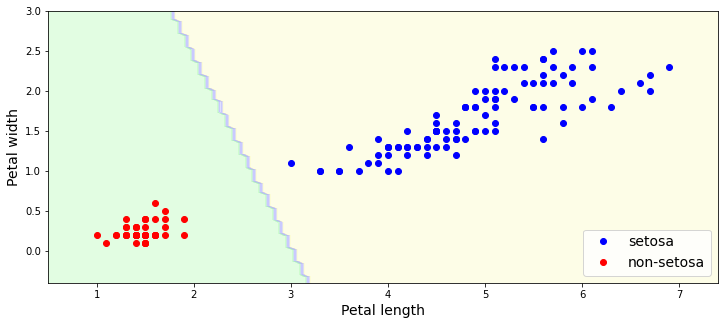

In [11]:
plt.figure(figsize=(12,5))
plot_decision_boundary(log_clf, X, y, labels=['setosa','non-setosa'])

## 1.3. Nearest Neighbors Classifier (knn)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5) # by default, n_neighbors = 5
knn_clf.fit(X,y)

KNeighborsClassifier()

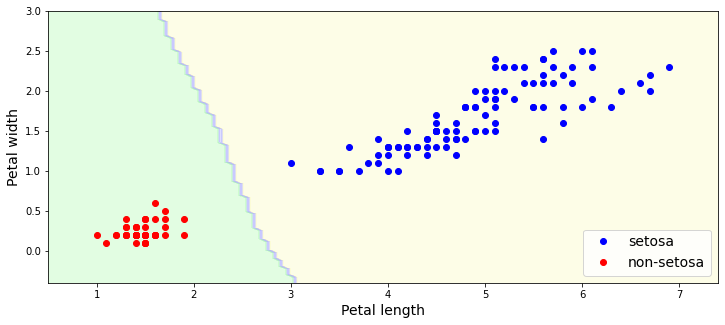

In [13]:
plt.figure(figsize=(12,5))
plot_decision_boundary(knn_clf, X, y, labels=['setosa','non-setosa'])

In [75]:
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance') # by default, n_neighbors = 5
knn_clf.fit(X,y)

KNeighborsClassifier(weights='distance')

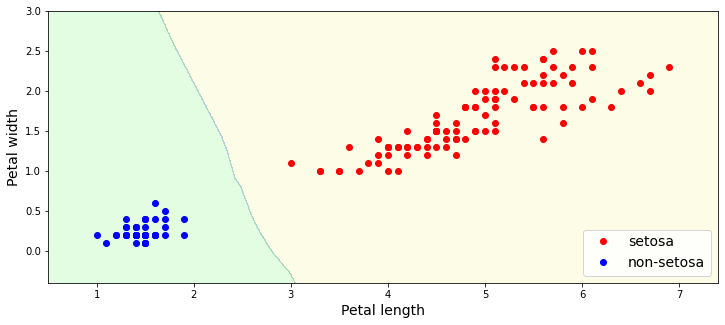

In [78]:
plt.figure(figsize=(12,5))
plot_decision_boundary2(knn_clf, X, y, labels=['setosa','non-setosa'])

# Adding polynomial features

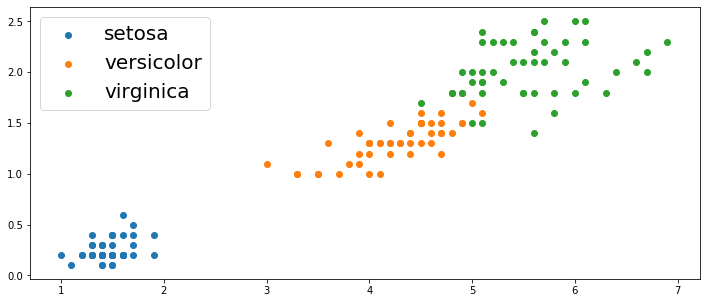

In [84]:
plt.figure(figsize=(12,5))
for specie in iris.species.unique():
    plt.scatter(X.loc[iris.species==specie,'petal_length'], X.loc[iris.species==specie,'petal_width'], label=specie)
    plt.legend(fontsize=20)

In [86]:
my_map = {'setosa':0,'versicolor':1,'virginica':0}
iris['is_versicolor'] = iris.species.map(my_map)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,is_virginica,is_versicolor
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [87]:
my_labels = ['petal_length','petal_width']
X = iris[my_labels]
y = iris.is_versicolor

## Linear Models (regression, logistic regression, linearSVC)

Text(0.5, 1.0, 'Regression classification boundarier')

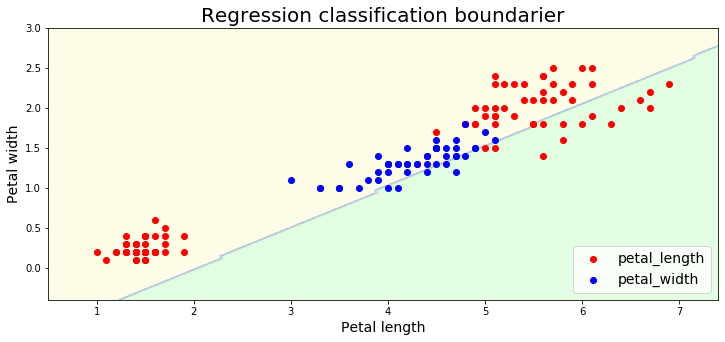

In [105]:
# train regression model
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier() # import classifier
clf.fit(X,y)
# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y, my_labels)
plt.title('Regression classification boundarier', fontsize=20)

Text(0.5, 1.0, 'Logistic regression classification boundarier')

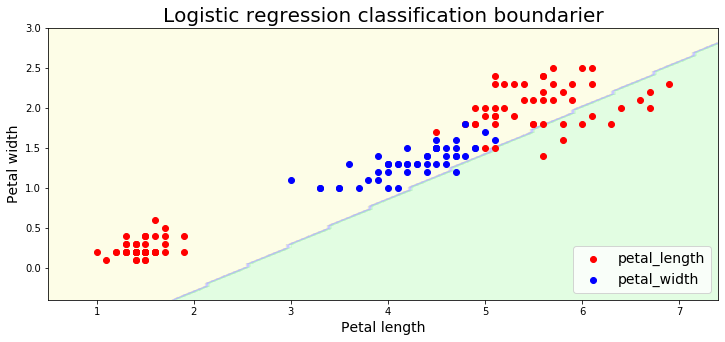

In [104]:
# train logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() # import classifier
clf.fit(X,y)
# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y, my_labels)
plt.title('Logistic regression classification boundarier', fontsize=20)

Text(0.5, 1.0, 'linearSVC classification boundarier')

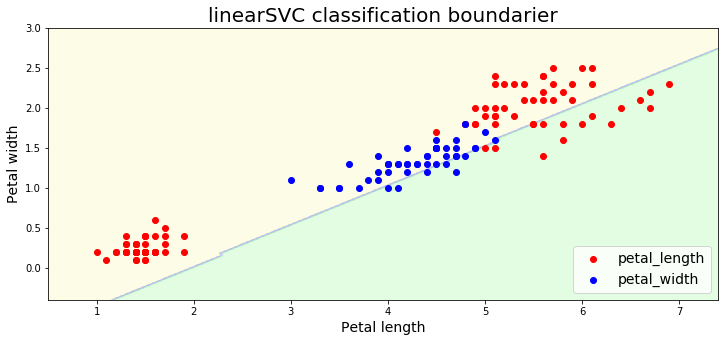

In [103]:
clf = LinearSVC(max_iter=1000)
clf.fit(X,y)
# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y, my_labels)
plt.title('linearSVC classification boundary', fontsize=20)

## Nonlinear Models (Classification Trees, knn)

Text(0.5, 1.0, 'knn classification boundaries')

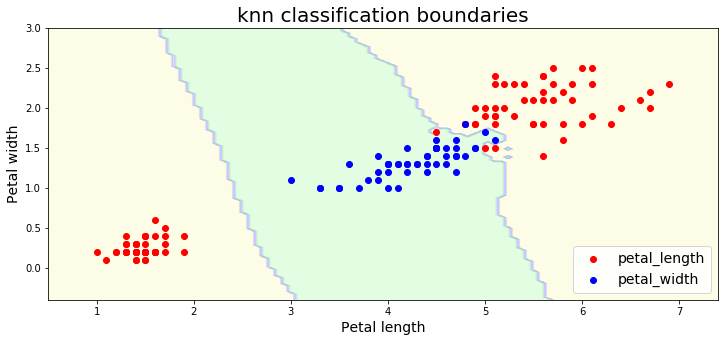

In [101]:
# train knn model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(weights='distance') # import classifier
clf.fit(X,y)
# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y, my_labels)
plt.title('knn classification boundary', fontsize=20)

Text(0.5, 1.0, 'tree classification boundaries')

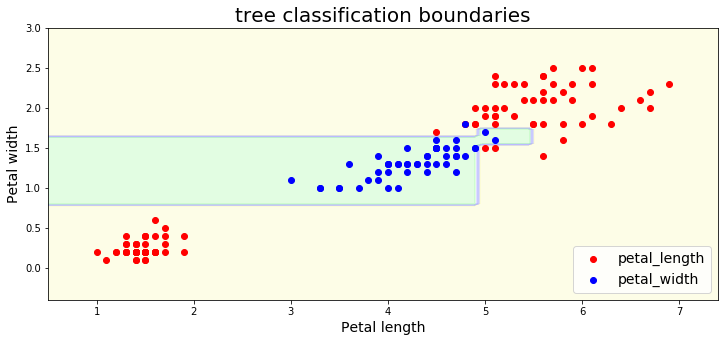

In [107]:
# train tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() # import classifier
clf.fit(X,y)
# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y, my_labels)
plt.title('tree classification boundary', fontsize=20)

## Linear Model + polynomial features: Making linear models great again

In [108]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X_transformed = poly.transform(X)
X_transformed.shape, X.shape

((150, 6), (150, 2))

Text(0.5, 1.0, 'Regression classification boundarier')

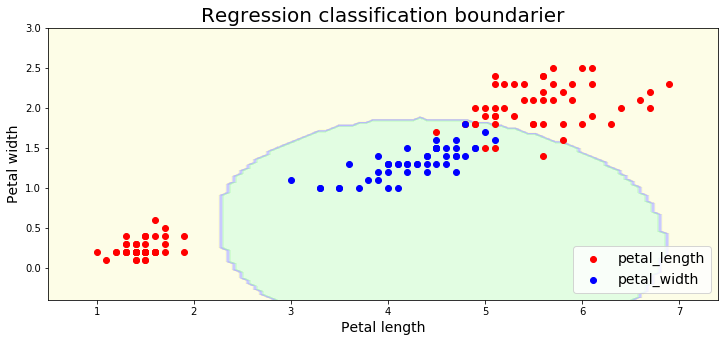

In [110]:
# train regression model
clf = RidgeClassifier() # import classifier
clf.fit(X_transformed,y)
# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y,my_labels,transformation=poly)
plt.title('Regression classification boundarier', fontsize=20)

Text(0.5, 1.0, 'Logistic regression classification boundarier')

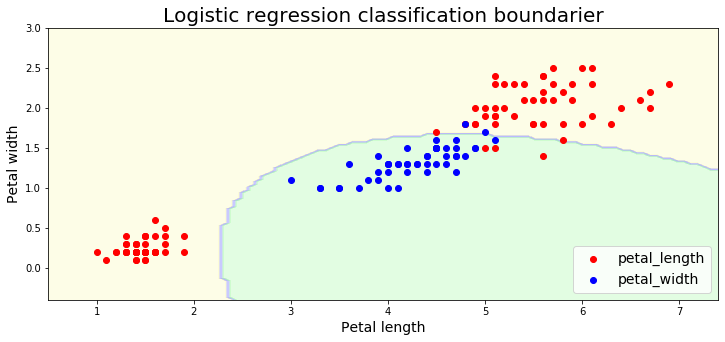

In [112]:
# train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_transformed,y)
# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y,my_labels,transformation=poly)
plt.title('Logistic regression classification boundarier', fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, 'LinearSVM classification boundarier')

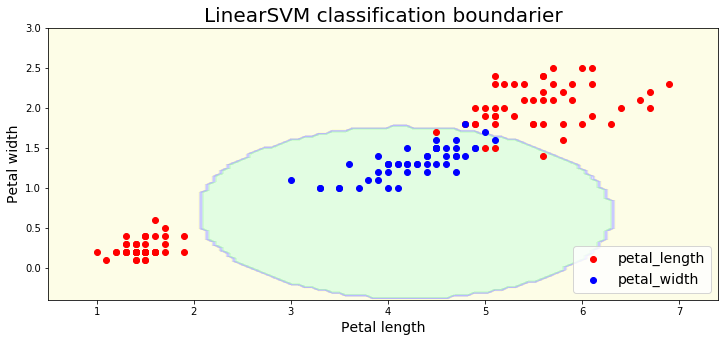

In [121]:
# train linearSVC
clf = LinearSVC(max_iter=2000)
clf.fit(X_transformed,y)
# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y,my_labels,transformation=poly)
plt.title('LinearSVM classification boundarier', fontsize=20)

## LinearSVC vs SVC

In [164]:
# toy dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise = 0.15)
X = pd.DataFrame(X,columns=['feature 1','feature 2'])
y = pd.Series(y)
X.head()

,feature 1,feature 2
0,-0.901854,0.501108
1,0.629036,-0.242554
2,0.377209,0.901765
3,1.366083,-0.206816
4,-0.023176,1.247010


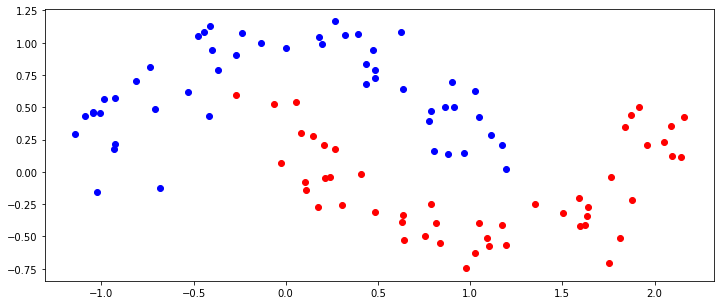

In [136]:
# plot dataset
plt.figure(figsize=(12,5))
plt.plot(X.iloc[y==0,0],X.iloc[y==0,1], 'bo')
plt.plot(X.iloc[y==1,0],X.iloc[y==1,1], 'ro')

Text(0.5, 1.0, 'linearSVC')

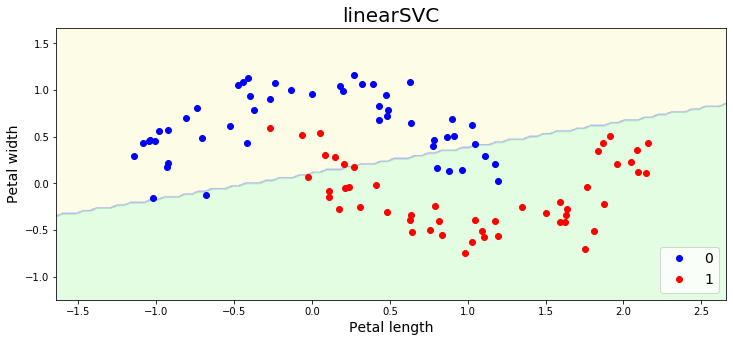

In [142]:
clf = LinearSVC()
clf.fit(X,y)

my_labels = ['0','1']

# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y, my_labels)
plt.title('linearSVC', fontsize=20)

Text(0.5, 1.0, 'LinearSVM + polynomial features')

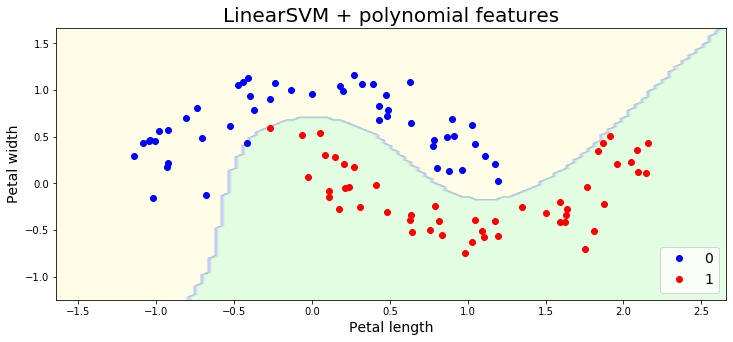

In [162]:
poly = PolynomialFeatures(degree=5)
poly.fit(X)
X_transformed = poly.transform(X)

clf = LinearSVC(max_iter=4000)
clf.fit(X_transformed,y)
# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y,my_labels,transformation=poly)
plt.title('LinearSVM + polynomial features', fontsize=20)

Text(0.5, 1.0, 'SVC + polynomial filter')

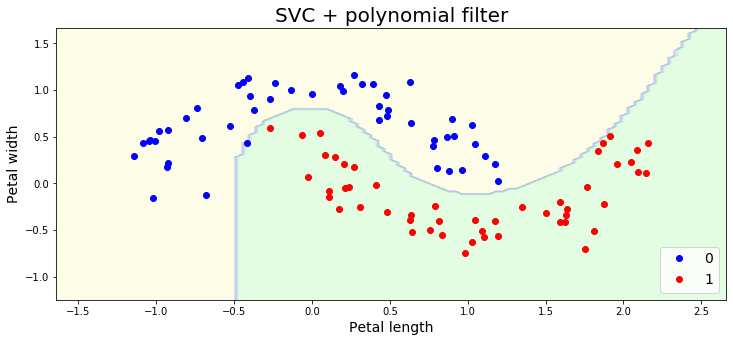

In [158]:
from sklearn.svm import SVC
clf = SVC(kernel = 'poly',degree=5, coef0=1)
clf.fit(X,y)

my_labels = ['0','1']

# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y, my_labels)
plt.title('SVC + polynomial filter', fontsize=20)

Text(0.5, 1.0, 'SVC + rbf filter')

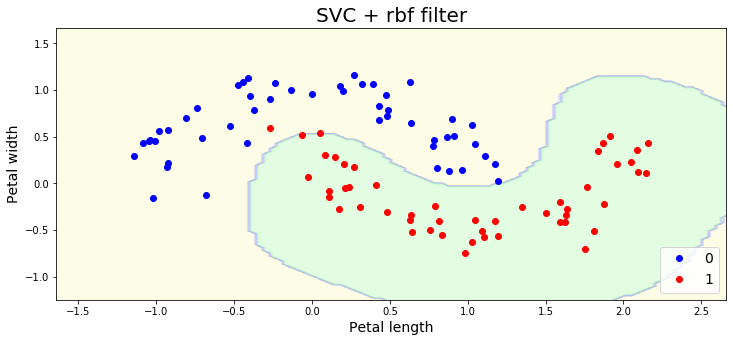

In [154]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', gamma= 5, C = 0.001)
clf.fit(X,y)

my_labels = ['0','1']

# plot dataset + decision boundary
plt.figure(figsize=(12,5))
plot_decision_boundary(clf, X, y, my_labels)
plt.title('SVC + rbf filter', fontsize=20)

In [165]:
y.unique()

array([0, 1], dtype=int64)